# Hackathon RIIAA 2021  -  JusticIA para los desaparecidos

Este notebook incluye las instrucciones y código para acceder a los datos recomendados para el evento.

El conjunto de datos se divide en tres:
* Fichas_manual: ~1k fotos de fichas provenientes de los ficheros del AGN por medio de Archivos de la Represión de las cuales contamos con transcripciones manuales de alta calidad.
* Fichas_auto: ~1k fotos de fichas provenientes de los ficheros del AGN por medio de Archivos de la Represión de las cuales contamos con transcripciones automáticas de calidad media.
* Expedientes: ~1k fotos de fijas de expedientes de mujeres embarazadas desaparecidas provenientes del AGN de las cuales no hay transcripciones.

Las imagenes se encuentran en [Datos - Hackathon JusticIA](https://drive.google.com/drive/folders/1VIu3JBV6-LlPbSLwQYLAw_N5PSh7cPgp?usp=sharing) y la liste de archivos con las transcripciones en [Transcripciones - Hackathon JusticIA]().

Es posible acceder a mas imagenes sin transcripción en la [Biblioteca integra de Archivos de la Represión](https://archivo.archivosdelarepresion.org/) y a documentos sobre el tema en el [Corpus Público de la CNB]().

## 1. Agregar y acceder a la carpeta compartida.

a) Accede a la carpeta donde se encuentran los datos: [Datos - Hackathon JusticIA](https://drive.google.com/drive/folders/1VIu3JBV6-LlPbSLwQYLAw_N5PSh7cPgp?usp=sharing)  
b) Agrega un link a tu Google Drive usando la opción `Add Shortcut to Drive` esto agregará la carpeta a tu directorio raíz.
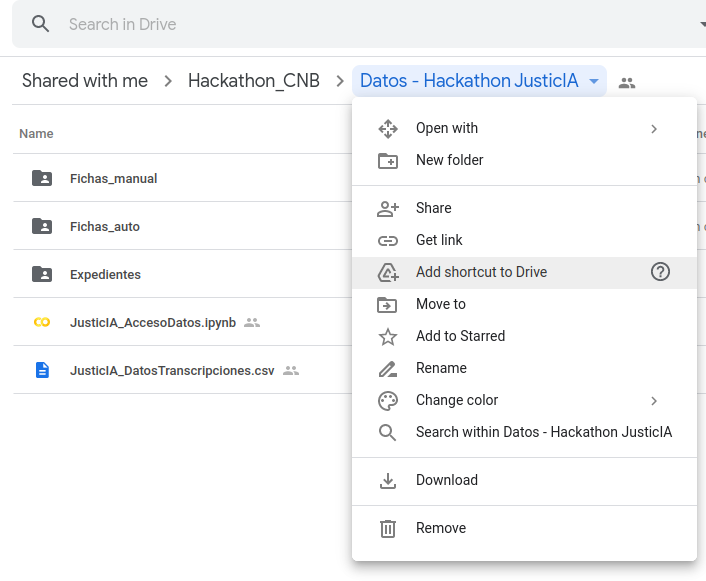

c) Ejecuta las siguientes lineas de código. Haz click en el link azul y sigue las instrucciones de autentificación, no olvides copiar el token de acceso, pegarlas en la caja que aparece abajo y dar Enter. Si has ejecutado correctamente este código apareceran todas las carpetas y archivos en tu Drive incluyendo `Datos - Hackathon JusticIA`.





In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Leer la lista de archivos

EL conjunto de datos incluye un csv `JusticIA_DatosTranscripciones.csv` con los archivos, el texto transcrito y varios metadatos.

Nota: si cambias el lugar donde se encuentra el link a la carpeta de los datos será necesario que actualices los paths.

In [2]:
import pandas as pd

in_dir = 'drive/MyDrive/Datos - Hackathon JusticIA/'
in_file = 'JusticIA_DatosTranscripciones.csv'

df = pd.read_csv(in_dir+in_file)

in_file = 'organizations.csv'

orgs = pd.read_csv(in_dir+in_file, encoding='utf-8', delimiter=",", error_bad_lines=False)
#df.tail()

in_file = 'places.csv'

places = pd.read_csv(in_dir+in_file, encoding='utf-8', delimiter=",", error_bad_lines=False)
#df.tail()

in_file = 'prosecuted.csv'

prose = pd.read_csv(in_dir+in_file, encoding='utf-8', delimiter=",", error_bad_lines=False)
#df.tail()

in_file = 'civilservants.csv'

civil = pd.read_csv(in_dir+in_file, encoding='utf-8', delimiter=",", error_bad_lines=False)
#df.tail()



b'Skipping line 90: expected 1 fields, saw 3\nSkipping line 108: expected 1 fields, saw 10\nSkipping line 110: expected 1 fields, saw 3\nSkipping line 113: expected 1 fields, saw 4\nSkipping line 127: expected 1 fields, saw 3\nSkipping line 195: expected 1 fields, saw 5\nSkipping line 196: expected 1 fields, saw 2\nSkipping line 199: expected 1 fields, saw 9\nSkipping line 206: expected 1 fields, saw 8\nSkipping line 251: expected 1 fields, saw 2\nSkipping line 261: expected 1 fields, saw 2\nSkipping line 381: expected 1 fields, saw 3\nSkipping line 384: expected 1 fields, saw 2\nSkipping line 401: expected 1 fields, saw 2\nSkipping line 403: expected 1 fields, saw 2\nSkipping line 408: expected 1 fields, saw 2\nSkipping line 426: expected 1 fields, saw 4\nSkipping line 439: expected 1 fields, saw 2\nSkipping line 440: expected 1 fields, saw 2\nSkipping line 445: expected 1 fields, saw 3\nSkipping line 446: expected 1 fields, saw 2\nSkipping line 449: expected 1 fields, saw 2\nSkipping

# 3. Ejecutar una función en todos los archivos

Una opción es recorrer las carpetas de archivos usando glob. En este caso imprimiremos el ancho y largo de 20 archivos al azar.

In [3]:
import PIL
import re 
from glob import glob
from random import sample

def get_width_and_height(file_name):
    image = PIL.Image.open(file_name)
    return image.size
    
files = glob(in_dir+'/Fichas_manual/*.*')+glob(in_dir+'/Fichas_auto/*.*')
#files = sample(files, 20)

for file_name in files[1270:1281]:
    width, height = get_width_and_height(file_name)
    print(width, height, file_name)

3264 2448 drive/MyDrive/Datos - Hackathon JusticIA//Fichas_auto/Ficheros_ACNR_militantes_Martinez_Bravo_Eugenio_IMG_0102.JPG
4608 3456 drive/MyDrive/Datos - Hackathon JusticIA//Fichas_auto/Ficheros_PDLP_74-08-11_a_79-04-10_PDLP_Fichas-87-.JPG
4608 3456 drive/MyDrive/Datos - Hackathon JusticIA//Fichas_auto/Ficheros_Policia_de_Guerrero_IMG_0301.JPG
4608 3456 drive/MyDrive/Datos - Hackathon JusticIA//Fichas_auto/Ficheros_UAG_78-04-15_a_78-11-10_UAG,_fichas-101-.JPG
4608 3456 drive/MyDrive/Datos - Hackathon JusticIA//Fichas_auto/Ficheros_Represores_Figueroa_Figueroa_Ruben_Figueroa_Figueroa_Ruben_2_De_79-07-20_a_83-06-04,_FIGUEROA_FIGUEROA,_Ruben-16-.JPG
4608 3456 drive/MyDrive/Datos - Hackathon JusticIA//Fichas_auto/Ficheros_Gobernadores_Ruben_Figueroa_Ruben_figueroa_Fichas.-88-.JPG
2304 1728 drive/MyDrive/Datos - Hackathon JusticIA//Fichas_auto/Ficheros_Brigada_Campesina_de_Ajusticiamiento_BCA_Comisiones_Brigada_Campesina_de_Ajusticiamiento,_Comisiones-33-.JPG
3264 2448 drive/MyDrive/Dato

Es posible usar los datos en el archivo csv para reconstruir los paths. La columna `Conjunto` corresponde a la carpeta y `NombreArchivo` al archivo. Esto permite filtrar los archivos usando pandas, por ejemplo, calculemos el tamaño de las imagenes que tienen más de 2000 caracteres.

In [4]:
df_long = df[df['Texto'].str.len()>2000]

for dir, fil in zip(df_long['Conjunto'].values, df_long['NombreArchivo'].values):
    file_name = in_dir + dir + '/' + fil
    width, height = get_width_and_height(file_name)
    print(width, height, file_name)


3456 4608 drive/MyDrive/Datos - Hackathon JusticIA/Fichas_manual/Ficheros_UPCEG,_Version_Publica-59-04-09_a_85-12-04-,_Guerrero_UPCEG,_2_de_4-67-04-21_a_69-09-18-_2_de_4-67-04-21_a_69-09-18-33-.JPG
4608 3456 drive/MyDrive/Datos - Hackathon JusticIA/Fichas_auto/Ficheros_Corral_Garcia_Salvador,_Version_Publica_Corral_Garcia_Salvador,_Version_Publica-147-.JPG
4608 3456 drive/MyDrive/Datos - Hackathon JusticIA/Fichas_auto/Ficheros_Detenidos_Desaparecidos_Arenas_Bautista_Marcelo_74-08-09,_ARENAS_BAUTISTA,_Marcelo-10-.JPG
4608 3456 drive/MyDrive/Datos - Hackathon JusticIA/Fichas_auto/Ficheros_Esparza_Flores_Jose_Luis_Esparza_Flores_Jose_Luis-23-.JPG
4608 3456 drive/MyDrive/Datos - Hackathon JusticIA/Fichas_auto/Ficheros_Esparza_Flores_Jose_Luis_Esparza_Flores_Jose_Luis-26-.JPG
4608 3456 drive/MyDrive/Datos - Hackathon JusticIA/Fichas_auto/Ficheros_Frente_Armado_del_Pueblo_Fichas_Frente_Armado_del_Pueblo,_fichas-66-.JPG
4608 3456 drive/MyDrive/Datos - Hackathon JusticIA/Fichas_auto/Ficheros_G

## ¡Gracias!

In [5]:
! apt install tesseract-ocr
! apt install libtesseract-dev
! pip install Pillow
! pip install pytesseract
! pip install autocorrect

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 40 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,405 kB/s)
Selecting previously unselect

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# Import required packages
import pytesseract

from scipy.ndimage import interpolation as inter
from scipy.ndimage import rotate

In [7]:
def correct_skew(image, delta=1, limit=15):
    def determine_score(arr, angle):
        data = inter.rotate(arr, angle, reshape=False, order=0)
        histogram = np.sum(data, axis=1, dtype=float)
        score = np.sum((histogram[1:] - histogram[:-1]) ** 2, dtype=float)
        return histogram, score

    #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = image #cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 55, 24)   #55, 24
    #cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1] 

    scores = []
    angles = np.arange(-limit, limit + delta, delta)
    for angle in angles:
        histogram, score = determine_score(thresh, angle)
        scores.append(score)

    best_angle = angles[scores.index(max(scores))]

    (h, w) = thresh.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, best_angle, 1.0)
    rotated = cv2.warpAffine(thresh, M, (w, h), flags=cv2.INTER_CUBIC, \
              borderMode=cv2.BORDER_REPLICATE)
    
    thresh = rotated

    while True:
      osd_rotated_image = pytesseract.image_to_osd(thresh)

      # using regex we search for the angle(in string format) of the text
      angle_rotated_image = re.search('(?<=Rotate: )\d+', osd_rotated_image).group(0)

      if (angle_rotated_image == '0'):
        thresh = thresh
        # break the loop once we get the correctly deskewed image
        break
      elif (angle_rotated_image == '90'):
        thresh = rotate(thresh, angle=90) #thresh.rotate(thresh,90,(255,255,255)) # rotate(image,angle,background_color)
        continue
      elif (angle_rotated_image == '180'):
        thresh = rotate(thresh, angle=180)#thresh.rotate(thresh,180,(255,255,255))
        continue
      elif (angle_rotated_image == '270'):
        thresh = rotate(thresh, angle=270)#thresh.rotate(thresh,90,(255,255,255))
        continue    

    scores = []
    angles = np.arange(-limit, limit + delta, delta)
    for angle in angles:
        histogram, score = determine_score(thresh, angle)
        scores.append(score)

    best_angle = angles[scores.index(max(scores))]

    (h, w) = thresh.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, best_angle, 1.0)
    rotated = cv2.warpAffine(thresh, M, (w, h), flags=cv2.INTER_CUBIC, \
              borderMode=cv2.BORDER_REPLICATE)

    return rotated




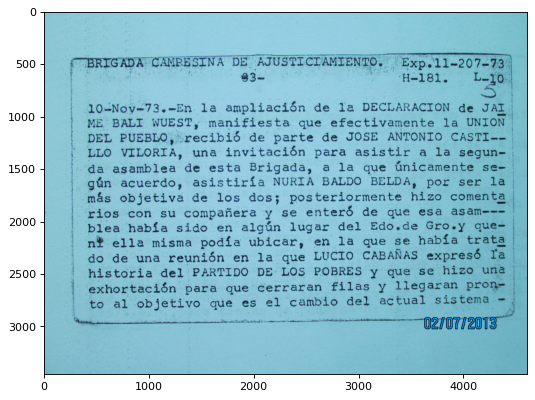

In [8]:
plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(cv2.imread(files[1280]), vmin=0, vmax=255) #3
cv2.waitKey(0)
plt.show()

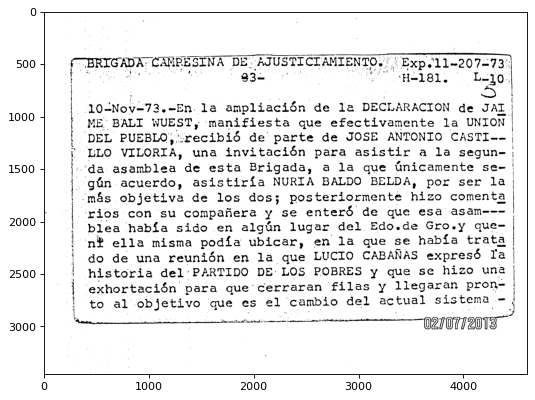

In [9]:
img = cv2.imread(files[1280]) #3
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh1 = correct_skew(gray,1,15)
plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(thresh1, cmap="gray", vmin=0, vmax=255)
cv2.waitKey(0)
plt.show()

In [10]:
def text_extract(imgs):
  #Se lee la imagen
  img = cv2.imread(imgs)

  # Convert t3he image to gray scale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  #image
  #thresh = 150

  # Adaptive Thresholding requires the blocksize to be odd and bigger than 1
  #blockSize =int(1 / 8 * np.size(img)[0] / 2 * 2 + 1)
  #if blockSize <= 1:
  #    blockSize = np.size(img)[0] / 2 * 2 + 1
  #consta = 10

  # Le pone el fondo negro y letras blancas, treshold de 170
  #thresh1 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 55, 24) ## 55,22
  #cv2.threshold(gray, thresh, 255,  cv2.THRESH_BINARY_INV) #[1]cv2.threshold(gray, thresh, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

  thresh1 = correct_skew(gray,0.5,20)

  plt.figure(figsize=(8, 6), dpi=80)
  plt.imshow(thresh1, cmap="gray", vmin=0, vmax=255)
  cv2.waitKey(0)
  plt.show()

  # Specify structure shape and kernel size.
  # Kernel size increases or decreases the area
  # of the rectangle to be detected.
  # A smaller value like (10, 10) will detect
  # each word instead of a sentence.
  rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))

  # Appplying dilation on the threshold image
  dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)

  # Finding contours
  contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,
												cv2.CHAIN_APPROX_NONE)

  # Creating a copy of image
  im2 = thresh1.copy()

  # A text file is created and flushed
  #file = open("recognized.txt", "w+")
  #file.write("")
  #file.close()

  # Looping through the identified contours
  # Then rectangular part is cropped and passed on
  # to pytesseract for extracting text from it

  for cnt in contours:
    
    x, y, w, h = cv2.boundingRect(cnt)
    rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2) # Drawing a rectangle on copied image
    cropped = im2[y:y + h, x:x + w] # Cropping the text block for giving input to OCR
    text = pytesseract.image_to_string(cropped)
    #print(text) 	# Open the file in append mode | #file = open("recognized.txt", "a") |	# Apply OCR on the cropped image

  #text = pytesseract.image_to_string(im2)


  return(text)

In [ ]:
# from autocorrect import Speller

# def final_text(file):
#   raw_text = text_extract(file)
#   raw_text_decoded = raw_text.encode(encoding = "ascii", errors = "ignore")
#   raw_text_decoded = raw_text_decoded.decode().strip()

#   raw_text_decoded = re.sub('[ \t]+', r' ', raw_text_decoded)
#   raw_text_decoded = re.sub('[ \n]{3,}', r'\n', raw_text_decoded)

#   raw_text_decoded = re.sub('[’:°º—|"”“}·«/!‘?¿@\~¥–$\-(){}\[\]%¡=&-+:->]', r'', raw_text_decoded)

#   spell = Speller(lang='es')

#   raw_text_decoded = spell(raw_text_decoded)

#   #print(raw_text_decoded)
#   #print()

#   output = ''
#   for line in raw_text_decoded.split('\n'):
#     result_line = ''
#     for i, word in enumerate(line.split(' ')):
#       if i > 0:
#         result_line += ' '
#       if len(word) > 0:
#         result_line += word[0] + word[1:].lower()
#     output += result_line + '\n'

#   return output

In [11]:
from autocorrect import Speller #<--------

def extract_exp(texto):
  try: 
    match = re.search(r'[\w\.-]+-[\d\.-]+-[\d\.-]+', texto)
    exp_nbr = match.group()
  except:
    exp_nbr = '---'

  if (re.search('Exp', exp_nbr) == None) and (re.search('Ex', exp_nbr) == None):
    exp_nbr = 'Exp-' + exp_nbr

  #print(i)
  #print(exp_nbr)
  return exp_nbr


def final_text(file):
  raw_text = text_extract(file)
  exp = extract_exp(raw_text)
  raw_text_decoded = raw_text.encode(encoding = "ascii", errors = "ignore")
  raw_text_decoded = raw_text_decoded.decode().strip()

  raw_text_decoded = re.sub('[ \t]+', r' ', raw_text_decoded)
  raw_text_decoded = re.sub('[ \n]{3,}', r'\n', raw_text_decoded)

  raw_text_decoded = re.sub('[’:°º—|"”“}·«/!‘?¿@\~¥–$\-(){}\[\]%¡=&-+:->]', r'', raw_text_decoded)

  spell = Speller(lang='es')

  raw_text_decoded = spell(raw_text_decoded)

  #print(raw_text_decoded)
  #print()

  output = ''
  for line in raw_text_decoded.split('\n'):
    result_line = ''
    for i, word in enumerate(line.split(' ')):
      if i > 0:
        result_line += ' '
      if len(word) > 0:
        result_line += word[0] + word[1:].lower()
    output += result_line + '\n'

  return output, exp

In [15]:
!spacy download es_core_news_sm

     |████████████████████████████████| 16.2 MB 5.4 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')


In [13]:
!spacy download es_core_news_md

     |████████████████████████████████| 78.4 MB 1.1 MB/s 
  Created wheel for es-core-news-md: filename=es_core_news_md-2.2.5-py3-none-any.whl size=79649483 sha256=5b29ee269e3bf3bd086df6737b73d242e99f67a8bd25323ff704dd3ebf49fe3a
  Stored in directory: /tmp/pip-ephem-wheel-cache-n_n5kp1o/wheels/d8/f5/92/ee8a4f74fac67775fbc0314b1c9ae4694f4180437f6fc3dd1c
Successfully built es-core-news-md
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_md')


In [17]:
import spacy
from spacy import displacy

#NER = spacy.load("es_core_news_md")
NER = spacy.load("es_core_news_sm")

#NER = spacy.load("en_core_web_sm")

OSError: ignored

In [ ]:
# final_text(files[1280])

In [ ]:
# text1 = NER(final_text(files[80])) #80

# for word in text1.ents:
#     print(word.text,word.label_)

In [ ]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

import datetime, random, locale
from babel.dates import format_date, format_datetime, format_time

sentences = ["Estaba {person} perteneciente a {org} el dia {date} en {place} para cometer un delito o algun tipo de crimen", 
             "El homicidio cometido en {place} que fue reportado por {person} en la fecha {date} se llevo acabo por {org}",
             "Hubo un evento el dia {date} del presente con el fin de someter a el Gobernador {person} cuando todos estaban en {place} junto a {org}",
             "{person} declaró que el asesinato ocurrió el día {date} en {place} por el líder de {org}",
             "miembros de {org} presidido por {person} fueron vistos en {place} después de que se denunciara el crimen el día {date}",
             "innumerables amenazas a la persona {person} aproximadamente el día {date} por el presunto miembro de {org} ubicado en {place}",
             "{place} fue el centro de reunión del {org} donde se registró el crimen en la fecha {date}",
             "{person} fue visto por última vez en su domicilio en {place} el día {date}",
             "las extorsiones que {person} efectuaba se había registrado el dia {date}",
             "en {place} se había visto por última vez a los miembros de {org} presididos por {person}",
             "en la fecha de {date} se sucito un delito cometido presuntamente por {person} que se conoce es miembro del {org} de estado de la republica {place}",
             "cuando la {org} estaba en {place} detuvieron en {date} al individuo {person} que es Gobernador"]


persons_set = list(prose['PROSECUTED '])+list(civil['CIVILSERVANTS ']) #["Luis Alberto", "Juan Lopez", "Carlos Prado"]
places_set = list(places.index+places['PLACES ']) #["Ciudad de Mexico", "Tijuana", "Leon Guanajuato", "Los Cabos"]
organizations_set = list(orgs['ORGANIZATIONS '])
date_formats = ["full", "medium", "long", "default"]

def getOverlap(a, b):
      return max(0, min(a[1], b[1]) - max(a[0], b[0]))

def generate_trainset(result_size = 100):
  result_set = []
  for i in range(result_size):
    sentence_idx = random.randint(0, len(sentences) - 1)
    person_idx = random.randint(0, len(persons_set) - 1)
    org_idx = random.randint(0, len(organizations_set) - 1)
    place_idx = random.randint(0, len(places_set) - 1)

    # Generate random date
    start_date = datetime.date(1964, 1, 1)
    end_date = datetime.date(1985, 12, 31)
    time_between_dates = end_date - start_date
    days_between_dates = time_between_dates.days
    random_number_of_days = random.randrange(days_between_dates)
    random_date = start_date + datetime.timedelta(days = random_number_of_days)
    date_format_idx = random.randint(0, len(date_formats) - 1)

    if date_formats[date_format_idx] != "default":
      random_date = format_date(random_date, locale = 'es_ES', format = date_formats[date_format_idx])
    else:
      random_date = random_date.strftime('%d-%m-%y')

    act_sentence = sentences[sentence_idx].replace("{person}", str(persons_set[person_idx])).replace("{org}", str(organizations_set[org_idx])).replace("{date}", random_date).replace("{place}", str(places_set[place_idx]))
    act_entities = []
    # Generate entities set

    if similar(str(persons_set[person_idx]), str(places_set[place_idx]))>0.5:
      continue
      
    ll = ll2 = pp = pp2 = -1

    m = re.search(str(persons_set[person_idx]), act_sentence)
    if m != None:
      act_entities.append((m.start(), m.end(), "PER"))
      pp = m.start()
      pp2 = m.end()

    m = re.search(str(organizations_set[org_idx]), act_sentence)
    if m != None:
      act_entities.append((m.start(), m.end(), "ORG"))
    
    m = re.search(random_date, act_sentence)
    if m != None:
      act_entities.append((m.start(), m.end(), "DATE"))
    
    m = re.search(str(places_set[place_idx]), act_sentence)
    if m != None:
      act_entities.append((m.start(), m.end(), "LOC"))
      ll = m.start()
      ll2 = m.end()

    if ll != -1 and  ll2 != -1 and pp2 != -1 and pp != -1:  
      if getOverlap([pp, pp2], [ll, ll2]) == 0 and getOverlap( [ll, ll2], [pp, pp2]) == 0:
        result_set.append( (act_sentence, {"entities": act_entities}) )

  return result_set

In [ ]:
       #(df[df.MetodoTexto == 'manual'].Texto[1],{ "entities":[(0,19,"PER"),(53, 57, 'DATE')] }),
       #(df[df.MetodoTexto == 'manual'].Texto[2],{ "entities":[(114, 137, 'PER'),(346, 373, 'PER'),(260, 269, 'DATE'),(448, 456, 'DATE')] }),
       #(df[df.MetodoTexto == 'manual'].Texto[3],{ "entities":[(0, 21, 'PER'),(113, 148, 'PER'),(485, 521, 'PER'),(53, 64, 'DATE'),(211, 222, 'DATE')] }),
       #(df[df.MetodoTexto == 'manual'].Texto[4],{ "entities":[(82, 101, 'PER'),(474, 496, 'PER'),(155, 159, 'LOC'),(179, 187, 'LOC'),(103, 143, 'ORG'),(42, 51, 'DATE'),(409, 418, 'DATE')] }),
       #(df[df.MetodoTexto == 'manual'].Texto[5],{ "entities":[(0, 21, 'PER'),(240, 264, 'PER'),(332, 360, 'PER'),(480, 495, 'LOC'),(409, 420, 'DATE'),(529, 539, 'DATE')] }),
       #(df[df.MetodoTexto == 'manual'].Texto[6],{ "entities":[(0, 32, 'PER'),(142, 181, 'LOC'),(388, 414, 'LOC'),(431, 473, 'ORG'),(58, 67, 'DATE')] }),
       #(df[df.MetodoTexto == 'manual'].Texto[7],{ "entities":[(0, 21, 'PER'),(88, 103, 'PER'),(211, 235, 'PER'),(52, 63, 'DATE')] }),
       #(df[df.MetodoTexto == 'manual'].Texto[8],{ "entities":[(44, 56, 'PER'),(99, 115, 'PER')] }),
       #(df[df.MetodoTexto == 'manual'].Texto[9],{ "entities":[(0, 17, 'PER'),(110, 127, 'PER'),(381, 403, 'PER')] }),

In [ ]:
train=[
       ("Adame Flores Samuél. Exp-100-10-16-2-71. H-251 L-4 6-sept-71.-en la declaración de Cliserio De Jesus Arguelles,mencionaa a est Elemento como la persona que lo invito a participar en las actividades ilícitas de la gavilla de Genaro Vázquez Rojas,.",{ "entities":[(0,19,"PER"),(224,244,"PER")] }),
       ('Jaimes Hernandez, Florentino. Exp.11-168-70-12- H-384 L-16 11-mayo-70.- El 10 actual lo visitaron en la prisión Maria De Lourdes Sanchez Rosales, Braulia Jaimes Hernandez y Jaime Jaimez Hernandez. -exp.11-169-70 H-424 L-16 18-may-70. -el 17 actl., fué visitado en el Penal por:ma. De Lourdes Sanchez Rosales y Jaime Jaimes Hernandez.- Exp. 11-169-70 H-483 L-16 25-mayo-70 .- El 24 actual lo visitaron en la prisión Maria De Lourdes Sanchez Rosales, Braulia Jaimes Hernandez y Jaime Jaimes Hernandez.',{ "entities":[(0,16,"PER"),(112,144,"PER")] }),
       ('Jaimes Hernandez Florentino.- Exp. 1-169-71 H-344 L-22. -20- 22.- Mar-71 . -el 21 actl., visitádo por: Ma. De Lourdes Sanchez Rosales y Argeli Velazquez Morales.- El 28 actual lo visitó en presidio Braulia Jaimes Hernandez.- Exp-100-10-3-71.--el día 30 actual, en el periódico Trópico diario independiente de informaciń en Acapulco, sepublica los siguiente: -tenemos Guerrillas Urbanas Los Asaltos A Los Bancos Los Secuestros Y La Agitacion Estudiantil Tienen Un Solo Origen .-méxico, Df En los despachos de algunos abo ados con relacione',{ "entities":[(323,331,"LOC"),(477,487,"LOC"),(110,133,"PER")] }),
       ('Asociacion Civica Guerrerense Exp. 100-10-16-2 -60- /62 H 183 L 1.mo diera lugar. Después se desplazaron frente a la catedral, donde Odilon Acuña como Maestro de Ceremonias, dió lectura a un volante- distribuído el 9 de septiembre último en un -mitin celebrado en honor de Suarez Tellez. Después Angel Navarrete de Petatlán, Gro. dijo - - que están dispuestos a morir antes que el Dr. -raymundo Abarca llegue al poder Luis Cabañas- de Atoyac de Alvarez, dijo que retaba al Dip.-fed. Neftali Mena Mena Delegado Gral. del Pri para coordinar las actividades electorales de Guerrero a que vaya a Chilpancingo y demostrarle que ahí no existe el Pri.- Laureano Salcedo',{ "entities":[(646,662,"PER"),(0,29,"ORG"),(215,230,"DATE"),(315,323,'LOC'),(435,452,'LOC'),(520,523,'ORG'),(570,578,'LOC')] }),
       ('Segunda Parte. Asociacion Civica Guerrerense Exp-100-10-1-962. En El Estado De Guerrero. Este organismo es filial al C.n.o.r. Sesional En El Domiciii De Ramona Valdiolivar En Acapulco, Gro.- Eduardo Mendoza No. 12. Presidente.- Genaro Vazquez Rojas. Domicilio.- Zaragoza No. 4 en Iguala, Gro. Telefono.- 2-26-95 Acapulco, Gro.- Por medio de este telefono los dirigentes de esta Organismo jhacen sus llamadas Exp-100-10-16-2-62 L-1 H-281 a1290 se adjunta la Relacion de elementos miembros de esta Organimo que fueron detenidos por la Policia, por habe intervenido en el Zafarrancho del dia 30 de Dic',{ "entities":[(589,598,"DATE"),(15,44,"ORG"),(69,87,"LOC"),(153,171,'PER'),(262,292,'LOC')] }),
       ('Asociacion Civica Guerrerense.- Exp. 100-10-1-65-56- H-283 L-18 dice Vice-presidente de la Asociación y el que en su escrito en el que solicitó amparo señalo como dom.botón 10, dijo que su lucha c ntra el gobernador la llevarán hasta sus últimas consecuencias porque dicho funcionario los ha obligado a ello. Agregó que la escasa asistencia al mitin obedecía al temor que existe a las represalias de las autoridades y al mitin que celebró en esa población l Cci comunista.-al terminar el acto se lanzaron vivas al Sr. Pres. de la Rep., al lic Madrado y al Gral Leyva Mancilla y mueras al Gobernador del Estado.-',{ "entities":[(556,575,"PER"),(539,550,"PER")] }),
       ('ya que ha fracasado en su intento. Exp. 11-136-66 H-169 L-14 29-ago-66,-genaro Vazquez enviará telegrama Sr.pres. texto: presido, denuncia usted grave amenaza criminal existente contra Elpidio Ocampo miembro del partido comunista mexicano, Presidente Consejo Autodefensa Iguala, por parte del Gobernador Abarca,-quien mediante Mario Gonzalez ,ex-policía judicial el 6-sept-71',{ "entities":[(212,238,"ORG"),(366,375,'DATE'),(327,341,'PER'),(61,70,'DATE'),(72,86,'PER'),(185,199,'PER'),(251,277,'ORG')] }),
       ('Amada Ramirez De Castro. Maria Sotelo Hernandez. Ma. De Jesus Sotelo Vega. Ma. Trinidad Rodriguez Garduño. Clara Segura Malo. Maria. Trinidad Sotelo.miguel Cuenca Nuñez Lebrado Medina Gomez. Jesus Rodriguez Carreto. Miguel Orofeza Deloya. Estos ultimos originarios de Zacacoyuca, fueron detenidos frente a la casa Citada.- Por otro lado tambien se efectuo cateo en el domicilio de Odilon Acuña Cornejo, donde solo fue detenido Tiburcio Hernandez, al que se le recogierón 5 Cartucho calibre 10 retrocarga.- Este elemento explico que el aram correspondiente la había escondido su',{ "entities":[(0,23,"PER"),(25,47,'PER'),(49,73,'PER'),(75,105,'PER'),(107,124,'PER'),(126,148,'PER'),(149,168,'PER'),(169,189,'PER'),(191,214,'PER'),(216,237,'PER'),(268,278,'LOC'),(381,401,'PER'),(427,445,'PER')] }),
       ('ya que ha fracasado en su intento. Exp. 11-136-66 H-169 L-14 29-ago-66,-genaro Vazquez enviará telegrama Sr. Pres. texto: "asociación Cívica Guerrerense,presido, denuncia usted grave amenaza criminal existente contra Elpidio Ocampo, Presidente Consejo Autodefensa Iguala, por parte del Gobernador Abarca, quien mediante Mario Gonzalez ,ex-policía judicial durate asalto nuestras oficinas, asesinara al niño Delfino Ocampo, Ahora pretende asesinar al padre.- Dicho criminal a sueldo Gobierno Estado encuéntrase alojado Hotel Royalty de Iguala,buscando cazar nuestro compafiero y otros dirigentes Asociación Cívica.- agrupación popular presido, respetuosamente pide intervención superioridad su digno cargo póngase fin desmanes y criminales intenciones mal gobierno Sr. Abarca.-',{ "entities":[(61,70,"DATE"),(72,86,'PER'),(217,231,'PER'),(123,152,'ORG'),(244,270,'ORG'),(518,541,'LOC')] }),
       ('Tes De Loya Prof. Catalino Macedo Imona Valdiolivar, Daniel Sanchez, Eduardi Armijo, Manuel Navarrete, - u en dicho acto se Integro el Comite Pro-damnificados de Cuba. el cual quedo presidido por el Dr. Vega Arcos. - El mismo dia 7 actual en el domicilio de Roman Benitez se efectuo otra reunión en la cual se acordo.10. Adhesión a el Candidato que elija la Asoc. Civ. Guerrerense para Pte. de la Rep. 2.- yuda A los damnificados de Cuba.3.- Que se celebran reunion s cada miercoles de semana en el domicilio de Roman Benitez.- se hace notar que a dichas juntas asiste el Prof. Mario Moran Soto. . Exp-100-10-3-63 H-134 L-1 Nov-19/63.-el 17 del actual celebraron Asamblea- el Pps, M.l.n. y este organismo en el domicilio de Ramona Valdeolivar en Acapulco, Gro.',{ "entities":[(18,51,'PER'),(53,67,'PER'),(69,83,'PER'),(85,101,'PER'),(135,162,'ORG'),(199,213,'PER'),(358,380,'ORG'),(162,166,'LOC'),(258,271,'PER'),(578,594,'PER'),(724,742,'PER')] }),
       ('Asociacion Civica Guerrerense Exp.100-10-16/2--48- 64 H 3 L 2. y policías, quedando entre los dos fuegos ambos- y cuando el policía cayó al suelo, Genaro Vazquez huyó, por lo que el Agte.le disparó hiriéndolo en una pierna. Desde entonces anda oculto, pues se -dictó orden de aprehensión en su contra por homicidio, lesiones y resistencia de particulares.-exp-100-10-1-964.h-5 L-18.8.-dic.-64.- En relacion al Manifiesto de esta asociación, se sabe que no hubo expectación por él, ya que mas hubo indiferencia por parte del pueblo y algunas personas inclusive hirieron el comentario de que en caso de que hubiera otro Mi',{ "entities":[(0,29,'ORG'),(147,161,'PER'),(382,392,'DATE')]}),
       ('de Vazquez Rojas sino que también prticipa en - - ellas el Párraco de Atoyac de Alvrez Isidro Ramirez el cual es productor de copra y café y viene extorsionando al millonario Ernesto Gayosso,-exigiéndole diferentes sumas de dinero para Vazquez Rojas y Cabañas Barrientos aquienes desde -hace tiempo ayuda.- Expl 80-5-71h-12 L-1 28-sep-71. -al parecer elementos ligados a Vazquez Rojas, el 27 actual secuestraron a Julio Herschfield Almada, Director de A.s.a.y por que piden como rescate tres millones de pesos.- El recado comunicando el secuestro y las instrucciones a seguir, están firmadas por Frente Urbano Zapatista; Comando “2 De Octubre”.',{ "entities":[(3,16,'PER'),(70,86,'LOC'),(87,101,'PER'),(175,190,'PER'),(252,270,'PER'),(328,337,'DATE'),(414,438,'PER'),(596,619,'ORG'),(630,642,'DATE')]}),
       ('Revolución, editado en México, D.f., en el cual se dice: (ver fol-117).- En el poblado de San Jerónimo, Mpio.de Benito Juárez Jesus Barrientos y Fernando Sandoval, se didcan a incitar a la población, para que se una a la Asoc. Cívica uerrerense en la que militan.- Exp-100-10-1-67.h- 372 L-28 1/o-nov-67.- El nuevo cuadro directivo del Comite ívico guerrerense, quedó formado como sigue:- Roberto Diego Radilla. Presidente. Bartolome Flores Rodríguez.- Srio.gral. Sigfrido De La Barrera. Srio.actas y Acds. Prisco Vinalaya Olivano. Srio.organización. Filomeno Caro. Srio. Tesorero. Ramon Ramos Palma. Sio. Asuts. sind.',{ "entities":[(23,35,'LOC'),(90,102,'LOC'),(104,125,'LOC'),(126,142,'PER'),(145,162,'PER'),(288,303,'DATE'),(389,410,'PER'),(424,450,'LOC'),(464,486,'PER'),(507,530,'PER'),(551,564,'PER'),(582,599,'PER')]}),
       ('Asociacion Civia Guerrerense 012-025-014 22 Ene.82 La Mayoria De Sus Miembros Son De La Universidad Aut. De Guerrero.-dirigente: Prof. Arturo Miranda Ramirez. Esta Asociacion Fue Sustituida Por La Asociacion Civica Nacional Revolucionaria 009-011-026 31-ene-86',{ "entities":[(41,50,'DATE'),(88,116,'LOC'),(135,157,'PER'),(197,238,'ORG'),(251,260,'DATE')]}),
       ('que se encuentraran en los mismos, as como para localiar documentos y máquinas de escribir, de cuyos tipos se tomaron muestras.al res to fueron detenidos y se encuentran en poder de la Pol Jud.del Edo. La Profra. Concepcion Ramirez Altamirano De 62 años de edad, Cesar Espinobarros Y Ramirez Dr. de 33 años de edad, de Méx.df.,- Jose Nava Hernandez de 17 años, Carlos Castañeda Guzman de 23 años chofer. Bernando Gomez Figueroa de 26 años, Carlos Espinobarros Ramirez de 38 año Margarita Roque de 44 años Ascencio Roque Roque de 16 años Margaritaroque Rios de 19 años. Ramona Rios De Roque de 36 años Maria Delaluz Roquerios de 15 años, que presta sus ervicios en el domicilio de Bertha en la Sierra depuebla, además del mencion a Castillo Molina quienes será minuciosamente investigados sobre el particular o -',{ "entities":[(185,200,'ORG'),(213,242,'PER'),(263,281,'PER'),(319,326,'LOC'),(329,348,'PER'),(361,384,'PER'),(404,427,'PER'),(440,467,'PER'),(478,493,'PER'),(693,708,'LOC')]}),
       ('Amado Mendez Alvarado, Amada Alvarado De Mendez Enrique Mendez Alvarado. Exp-11-169-74.- H-91 L-43 5-feb-74.-el 3 actual,fu visitada en el penal por Amada Alv Ado De Mendez.amado Mendez Alvarado. 11-feb-74.-el 10 actual fué visitada en el penal por: Luis Ramirez Lazcano, Amada Mendez De Alvarado. Exp-11-169-74 18-feb-74. -el 17 actual fué visitada en el penal por: Amada Alvarado De Mendez. Exp.11-169;74 H-258 L-43 Mar-4-74.¡ El 3 actl. visitada en el penal por Mercedez Barquet Montañel, Amado Mendez Alvarado, Amada Alvarado De Mendez.',{ "entities":[(0,23,'PER'),(23,47,'PER'),(48,71,'PER'),(99,107,'DATE'),(196,205,'DATE'),(250,270,'PER'),(312,321,'DATE'),(465,490,'PER')]}),
       #('Vargas Viviano, Arturo.- Exp-100-10-1-75. (10) H-225 L-51 9-Abril-75.-Estudiantes de la Esc., Preparatoria No.7 "Salvador Allende",de Acapulco,Gro., dirigidos por éste elemento, acudieron ante los "paracaidistas", en La Laja, en el mismo Puerto, para brindarles su apoyo Leandro Velez Abarca y éste propio elemento, fueron requeridos por el Arq. Jorge Octavio Falcon Vega, Dir., del Plan Acapulco, indicándoles dicho funcionario que los terrenos de la Barranca de La Laja, seráin fraccionados y urbanizados para repartirlos entre los "paracaidistas", mediante un sorteo semanal, quedando de acuedo en que inicialmente se les entregarían 150 lotes y posteriormente 75, hasta agota el aérea, habiéndose firmado un acta sobre el particular.-Por otra parte éste mismo elemento estuvo celebrando asambleas en las', {"entities": [(0,22, 'PER'), (58,68, 'DATE'), (70,81, 'PER'), (88,111,'ORG'), (134,147, 'LOC'), (200,213, 'PER'), (219, 226, 'LOC'), (275,295, 'PER'), (348,378, 'PER'), (461,480, 'LOC')]}),
       ('instalaciones de la Preparatoia No.7, "Salvador Allende ,en Acapulco, Gro., y tuvo la intención de que sus simpatizantes se posesionaran de los predios que existían en la Barranca de La Laja pero Leandro Velez Abarca y Rufina Castellanos Peña se adelantaron a la acción y se apoderaron de los terrenos.- Contando éste con el apoyo del Síndico Proc.,del Ayunt., de Acapulco, Gro.,Hortencia Santoyo Nuñez. Exp-100-10-1-75. H-248 L-51 10-Abril-75.-El 9 actual, hizo acto de presencia encabezando un grupo de 20 personas en la Plaza Principal de Acapulco, Gro., donde se encontraban aprox.,300 estudiantes de las Escuelas Preparatorias Nos.2 y 7 de la U.A.G., donde les estaban impartiendo clases, suspendieron las actividades docentes, para iniciar un mitin dond el único orador fue éste líder, quien exhortó a los ahí', {"entities": [(20,36,'ORG'), (60,74,'LOC'), (171,190,'LOC'), (196,216,'PER'), (219,242,'PER'), (335,348,'PER'), (353,359,'ORG'), (379,402,'PER'), (432,443,'DATE'), (523,556,'LOC'), (609,653,'ORG')]}),
       ('Hernandez Diaz juan Guillermo. Exp-100-10-1-77.- H-264 L-68 8 sus migajas, por tal motivo imploran el alto a larepresión prometiendo a sus amos los buergueses controlar a la clase trabajadora con el objeto de que los dejen seguir teniendo sus posiciones políticas que lespermitan vivir holgadamente a costillas del proletariado, indicando este Elemento, que los pequeños burgueses no se daban cuenta que el Movimiento Revolucionario del Proletariado se desarrollaba como en ese momento histórico estaba viviendo el pueblo de Guerrero, provodado, por la crisis política e ideológica entre el Estado Burgués Mexicano y por tal motivo la misma burguesía -tenía que reprimir al movimiento Revolucionario y a sus elementos mas destacados en la lucha.Ejemplo de esto según Hernandez Diaz fué el movimiento "enfermo" de Sinaloa, que fué traicionado por el P.C.M., por lo cual los camaradas --', {"entities": [(0,29,'PER'), (407,449,'ORG'), (525,533,'LOC'), (591,614,'ORG'), (674,699,'ORG'), (813,820,'LOC'), (849,855,'ORG')]}),
       ('dio a la U.A.G.,respeto a la autonomía y la devolución de los terrenos e instalaciones de la Escuela Superior de Iguala Gro..Repudió a los dirigentes "Charros" y exhortó a los trabajadores huelguistas a unirse a la verdadera lucha en un frente común para exigir el subsidio con los que se podrán resolver sus necesidades.Finalmente dice:"Defender a la Universidad contra la embestida reaccionaria burguesa es defender un patrimonio valioso del pueblo.""Unidos Venceremos. Hasta La Victoria Siempre".Por otra parte se repartió otro volante en el que se ataca a la Administración de la U.A.G.,así como a la facción que la asesora del P.C.M.,exigiéndose la salida de los "aviadores":Efrain Bermudez Rivera, Hector Salayandia Olicas, Jorgea Alcaraz Vega,Felix Goded Andrew,Joan Sendra Ros', {"entities": [(9,15,'ORG'), (93,123,'ORG'), (563,590,'ORG'), (632,638,'ORG'), (680,702,'PER'), (704,728,'PER'), (730,749,'PER'), (750,768,'PER'), (769,784,'PER')]}),
       ('Vargas Viviano, Arturo. Exp.100-10-1-77 H-163 L-67 -14- 21-may-77.-Iguala Gro.-El 20 del act. De las 19.00 a las 20.00 hrs., se efectuó una marcha organizada por la Izquierda Independiente, en donde fue exhibida una manta conteniendo los nombres de esta persona y varias más, que se encuentran secuestradas, esta persona lo fué en Acapulco Gro., y es líder de la Colonia Barranca de la Laja. Esp-11-196-77 L-4 H-75 19-Oct-77-En afiche distribuido por la comisión coordinadora del Comite Pro-defensa de presos, perseguidos, desaparecidos y exiliados políticos, se menciona a éste elemento como uno de los desaparecidos en el Edo. de Gro. desde hace varios años.', {"entities": [(0,22,'PER'), (56,65,'DATE'), (67,78,'LOC'), (165,188,'ORG'), (331,344,'LOC'), (363,390,'LOC'), (415,424,'DATE'), (480,498,'ORG'), (624,636,'LOC')]})
]

In [ ]:
# for i in range(len(train)):
#   new_word = ''
#   for j, word in enumerate(train[i][0].split(' ')):
#     converted_word = word[0] + word[1:].lower()
#     if j > 0:
#       new_word += ' '
#     new_word += converted_word
#   print(new_word)

In [ ]:
train =  train + generate_trainset(result_size = 40)  #50
NER.pipe_names
ner_ner = NER.get_pipe("ner")
for _, annotations in train:
  for ent in annotations.get("entities"):
    ner_ner.add_label(ent[2])

disable_pipes = [pipe for pipe in NER.pipe_names if pipe != "ner"]

import random
from spacy.util import minibatch, compounding
from pathlib import Path

to_p = []

with NER.disable_pipes(*disable_pipes):
  optimizer = NER.resume_training()
  for iteration in range(200):
    random.shuffle(train)
    losses = {}

    batches =  minibatch(train, size =  compounding(32.0, 64.0, 1.001))
    for batch in batches:
      text, annotation = zip(*batch)
      NER.update(
          text,
          annotation,
          drop=0.1,
          losses = losses,
          sgd = optimizer
      )
      to_p.append(losses['ner'])
      print("Losses", losses)

Losses {'ner': 822.6909503936768}
Losses {'ner': 1436.003330230713}
Losses {'ner': 694.7152366638184}
Losses {'ner': 1352.3870067596436}
Losses {'ner': 739.6368503570557}
Losses {'ner': 1289.3316249847412}
Losses {'ner': 668.1801128387451}
Losses {'ner': 1172.108386039734}
Losses {'ner': 678.6287536621094}
Losses {'ner': 1212.3113994598389}
Losses {'ner': 674.8626461029053}
Losses {'ner': 1122.7934532165527}
Losses {'ner': 604.2925319671631}
Losses {'ner': 1073.2043914794922}
Losses {'ner': 554.7980842590332}
Losses {'ner': 994.5468997955322}
Losses {'ner': 524.8674669265747}
Losses {'ner': 996.9150123596191}
Losses {'ner': 491.1324071884155}
Losses {'ner': 875.3512048721313}
Losses {'ner': 515.6429901123047}
Losses {'ner': 935.0293283462524}
Losses {'ner': 524.5323677062988}
Losses {'ner': 943.8221740722656}
Losses {'ner': 447.27885150909424}
Losses {'ner': 913.6389989852905}
Losses {'ner': 371.16596126556396}
Losses {'ner': 880.1342115402222}
Losses {'ner': 472.55938053131104}
Losses

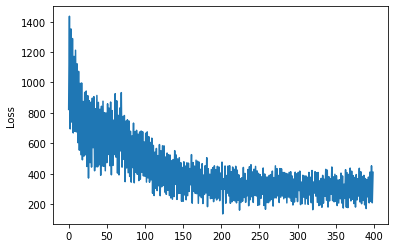

In [ ]:
#losses
import matplotlib.pyplot as plt
plt.plot(to_p)
plt.ylabel('Loss ')
plt.show()

In [ ]:
for text,_ in train:
  doc = NER(text)
  print("Entities", [(ent.text, ent.label_) for ent in doc.ents])

Entities [('Pol Jud.del Edo', 'ORG'), ('Concepcion Ramirez Altamirano', 'PER'), ('Cesar Espinobarros', 'PER'), ('Méx.df.', 'LOC'), ('Jose Nava Hernandez', 'PER'), ('Carlos Castañeda Guzman', 'PER'), ('Bernando Gomez Figueroa', 'PER'), ('Carlos Espinobarros Ramirez', 'PER'), ('Margarita Roque', 'PER'), ('Sierra depuebla', 'LOC')]
Entities [('Asociacion Civica Guerrerense', 'ORG'), ('9 de septiembre', 'DATE'), ('Petatlán', 'LOC'), ('Atoyac de Alvarez', 'LOC'), ('Pri', 'ORG'), ('Guerrero', 'LOC'), ('Laureano Salcedo', 'PER')]
Entities [('ezequiel bustamante uriostegui', 'PER'), ('11-09-79', 'DATE'), ('cocorit sonora', 'LOC'), ('coalicion de sindicatos de la industria hulera', 'ORG')]
Entities [('juan pablo leyva y cordoba', 'PER'), ('el tiempo', 'ORG'), ('9 de mayo de 1967', 'DATE'), ('nan', 'LOC')]
Entities [('Adame Flores Samuél', 'PER'), ('Genaro Vázquez Rojas', 'PER')]
Entities [('el suchil durango', 'LOC'), ('guadalupe aldava', 'PER'), ('jueves, 20 de julio de 1978', 'DATE'), ('el so

In [ ]:
txt, exp = final_text(files[80])

In [ ]:
exp

'Exp-100-10-1-79'

In [ ]:
print(txt)

sets wo  w. tae . . . ag _

Lopez Figueroa es uno de los principales accio
listas de la línea en cuesta6n y el que cuenta

con la mayoría de las unidades.este incremento
en el pasaje ha causado des contento general de

Los Usuaylos.ss  Exp. 10010179
Le79
24enero79.7e1 23 repeat en Chilean

Cinco, Gro. a las 12.00 hs. estuvo.en reunión 
del Gobernador Ing. Ben Figueroa, y 500.perso

 mas entre taxistas de Acapulco, Asociación6n de 

Transportistas de Acapulco  Mexicorama  y 
guías de turistas, con objeto de buscar solución
al problema de la transportar6n, ya que las 3



In [ ]:
text1 = NER(txt)   #.replace('\n', ' ').replace('\r', '') .replace('\n', '').replace('\r', '') .replace('\n', '').replace('\r', '')

for word in text1.ents:
    print(word.text,word.label_)

sets wo PER
Chilean

Cinco, Gro. LOC
Ing. Ben Figueroa PER
Acapulco  Mexicorama LOC


In [ ]:
files_eval = glob(in_dir+'/Evaluacion/Reto2/*.*')
#files = sample(files, 20)

In [ ]:
files_eval

['drive/MyDrive/Datos - Hackathon JusticIA//Evaluacion/Reto2/Ficheros_Brigada_Campesina_de_Ajusticiamiento_BCA_Brigada_Campesina_de_Ajusticiamiento-79-.JPG',
 'drive/MyDrive/Datos - Hackathon JusticIA//Evaluacion/Reto2/Ficheros_ACNR_militantes_Olea_Castaneyra_Rafel_Olea_Castaneyra_Rafael,_ACNR-19-.JPG',
 'drive/MyDrive/Datos - Hackathon JusticIA//Evaluacion/Reto2/Ficheros_Detenidos_Desaparecidos_Morales_Lopez_Delia_Morales_Lopez_Delia-23-.JPG',
 'drive/MyDrive/Datos - Hackathon JusticIA//Evaluacion/Reto2/Ficheros_UAG_76-11-16_a_77-03-19_UAG,_fichas-113-.JPG',
 'drive/MyDrive/Datos - Hackathon JusticIA//Evaluacion/Reto2/Ficheros_UAG_73-10-29_a_73-12-07_UAG,_fichas-134-.JPG',
 'drive/MyDrive/Datos - Hackathon JusticIA//Evaluacion/Reto2/Ficheros_Detenidos_Desaparecidos_Perez_Lopez_Martha_Perez_Lopez_Martha-21-.JPG',
 'drive/MyDrive/Datos - Hackathon JusticIA//Evaluacion/Reto2/Ficheros_FAR,_concentrado_general_FAR,_concentrado_general-157-.JPG',
 'drive/MyDrive/Datos - Hackathon JusticIA//

In [ ]:
import pandas as pd

textos = []
pers = []
plcs = []
orgsz = []
dts = []
exps = []

for file in files_eval:
  pe = []
  pl = []
  ors = []
  da = []
  txt, exp = final_text(file)
  #exp = extract_exp(txt)
  text1 = NER(txt.replace('\n', '').replace('\r', ''))   
  for word in text1.ents:
    if word.label_ == "PER":
      pe.append(word.text)
    elif word.label_ == "LOC":
      pl.append(word.text)
    elif word.label_ == "ORG":
      ors.append(word.text)
    elif word.label_ == "DATE":
      da.append(word.text)

  textos.append(txt)
  pers.append(pe)
  plcs.append(pl)
  orgsz.append(ors)
  dts.append(da)
  exps.append(exp)
 
# dictionary of lists 
diction = {'file': files_eval, 'text': textos, 'exp': exps, 'person': pers,'places': plcs, 'organizations': orgsz, 'dates': dts } 
    
final_csv = pd.DataFrame(diction)


In [ ]:
print(final_csv.loc[9,"text"])

Po wae oe Om Py tere we yy wr Ha Oo ge te rep mmo og pt Se es. 13d  10 1
, eee hod Vd Jove od ats oe bod ed Ed es  oo

pee A 202 ot A tile Here En

ae a 2, Nha Ned Rae S Ge
y Tr on a T56
i ha pied bien ad V con de elt ones eid  mie 1 dns w

rey er can ey he

7 . oy cite Pace 4  a 7 ee J. ee
ee eb a7 Pee Lto Ato Be Haber Qq 2 Univvaa Dporticlto
a  eo ra  7 res  my   \ a e 4 re on
on l a men site.gn op yidlunic  los corredor s enu abren
dol ello 28 do Octubre cl Lf Ser scotwed luis nts  fu 1 robot



r mlb po Fronte al Palacio de Gbnoeen ln Dede Pucelle,donde

wee rae why

im out nda ly cual fue integer nte Sus recibida por ele

Vopioegzolede Joe quien pidio al Snci rio citado cast ce
active el procedo do Jaua Vi waltauar y Joaquin Cl uo
surtido le Loss desde mayo de 1976,por su Davis slpneiaa on

Inv niñas ce tierra co on el ifoioede Sen vos Ac tono,pure

 e101 177, 7

H165 L56
ct r , rye

a rs

nat y Q 4 y we eee de T
7 All fe Hloasntos de esta Unis gorocodenws de ln a

a whe 
w

oa . 

In [ ]:
final_csv

,file,text,exp,person,places,organizations,dates
0,drive/MyDrive/Datos - Hackathon JusticIA//Eval...,fo Ofuusno Uvesoutid ns op Ssaquecaraagrr Sot ...,Exp----,[],[],[],[]
1,drive/MyDrive/Datos - Hackathon JusticIA//Eval...,"Aaa Cree 4\n\ney,\na\n\nLa Castaneyra Rafael U...",Exp-Oxp-11-240-74,"[Genaro Vazquez, Donactano UnaRadilla]",[Oaxaca],"[Hoshi.tal Civil de, laasociación Mexicana de ...",[]
2,drive/MyDrive/Datos - Hackathon JusticIA//Eval...,Lee en Un E eee We Lt Tr eee en poco te On Se ...,Exp-.11-235-75,[],"[Banco de Amecameca, 6 La Morena, sta Última, ...",[],[]
3,drive/MyDrive/Datos - Hackathon JusticIA//Eval...,As To Vv Fe\nRer fey ye\n\nron a conocer la s...,Expe-100-10-1-77,[Fra Mijnngos],[],[Sección Acapulco],[]
4,drive/MyDrive/Datos - Hackathon JusticIA//Eval...,"V I\.g ava or Diez\n\n30nove73,0fb1 dia 29 cua...",Exp----,"[Manuel Murrueta Urrutia, Benjamin Cpe Lopez, ...",[Torre de La Rectora de la.],[Does ademas del Lic],[]
5,drive/MyDrive/Datos - Hackathon JusticIA//Eval...,". pere\nRe Lopez, martha. xp, 1116970 \n13 H2...",Exp-11-169-70,"[pereRe Lopez, Alvarado Barrera]",[elp9naj Slo Alvarado Barrera],[],[]
6,drive/MyDrive/Datos - Hackathon JusticIA//Eval...,on ah\nláminas fueron distribuidas en las Colo...,Exp----,[Vicente Guerrero],[Zona Militar],[],[]
7,drive/MyDrive/Datos - Hackathon JusticIA//Eval...,"8 woe Ess\nce gt ee a at\n buster, que posteri...",Exp----,"[Felipe Vila Banda, Mata Vila]","[Distrito Federal, Edificio Guillemmo Prieto]",[Morelos Oriente],[]
8,drive/MyDrive/Datos - Hackathon JusticIA//Eval...,Martinez Ame Arturo Lic Ex10010162\nco po H301...,Ex-100-10-1-62,"[Martinez Ame Arturo, Miguel Lema Vaidez, Gilb...","[Hotel Residente de Acapulco,gro., Edo.]",[],"[30 de Dic, 3 del actual informo e unaCo.sion ..."
9,drive/MyDrive/Datos - Hackathon JusticIA//Eval...,Po wae oe Om Py tere we yy wr Ha Oo ge te rep ...,Exp----,[.we ine],[],[Fa toys 3 aot Sang],[]


In [ ]:
reto2a = pd.DataFrame(list(zip(final_csv.file, final_csv['exp'] + '|' + final_csv['text'])), columns = ['filename', 'text'])
reto2a.head()

,filename,text
0,drive/MyDrive/Datos - Hackathon JusticIA//Eval...,Exp----|fo Ofuusno Uvesoutid ns op Ssaquecaraa...
1,drive/MyDrive/Datos - Hackathon JusticIA//Eval...,"Exp-Oxp-11-240-74|Aaa Cree 4\n\ney,\na\n\nLa C..."
2,drive/MyDrive/Datos - Hackathon JusticIA//Eval...,Exp-.11-235-75|Lee en Un E eee We Lt Tr eee en...
3,drive/MyDrive/Datos - Hackathon JusticIA//Eval...,Expe-100-10-1-77|As To Vv Fe\nRer fey ye\n\nr...
4,drive/MyDrive/Datos - Hackathon JusticIA//Eval...,"Exp----|V I\.g ava or Diez\n\n30nove73,0fb1 di..."


In [ ]:
final_csv = final_csv.rename(columns = {'person': 'Persona', 'places': 'Lugar', 'organizations': 'Organizacion', 'dates': 'Fecha'})

cols = ['Persona', 'Lugar', 'Organizacion', 'Fecha']

def reto2b_format(col):
  df = final_csv[['file', col]].explode(col)
  return df

reto2b = []
for col in cols:
  aux = reto2b_format(col).rename(columns = {'file': 'filename', col: 'label'})
  aux['class'] = col
  reto2b.append(aux)

reto2b = pd.concat(reto2b).sort_values(['filename', 'class'])

reto2b.head()

,filename,label,class
1,drive/MyDrive/Datos - Hackathon JusticIA//Eval...,NaN,Fecha
1,drive/MyDrive/Datos - Hackathon JusticIA//Eval...,Oaxaca,Lugar
1,drive/MyDrive/Datos - Hackathon JusticIA//Eval...,Hoshi.tal Civil de,Organizacion
1,drive/MyDrive/Datos - Hackathon JusticIA//Eval...,laasociación Mexicana de Médicos Residentes,Organizacion
1,drive/MyDrive/Datos - Hackathon JusticIA//Eval...,Genaro Vazquez,Persona


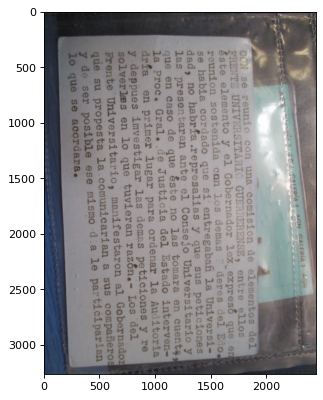

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(cv2.imread(files[1280]), vmin=0, vmax=255)
cv2.waitKey(0)
plt.show()

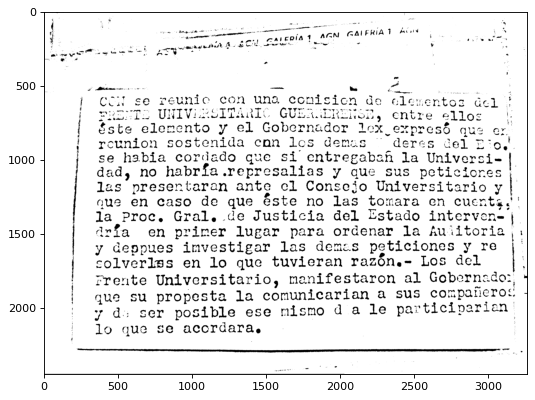

In [ ]:
img = cv2.imread(files[1280])
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh1 = correct_skew(gray,1,15)

plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(thresh1, cmap="gray", vmin=0, vmax=255)
cv2.waitKey(0)
plt.show()